In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Handlation

In [34]:
df = pd.read_csv('data/iris-data.csv')
df = df.dropna()
df['class'].replace(["Iris-setosa", "Iris-versicolor"], [1, 0], inplace=True)
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values

scalar = StandardScaler()
X = scalar.fit_transform(X)
X = np.append(X,np.ones((X.shape[0],1)),axis=1)
# Y = Y.reshape((Y.shape[0],1))
print(X.shape,Y.shape)
Y

(95, 5) (95,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Model, Loss Function, Optimizer

In [35]:
def model(X,W):
    return 1/(1+np.exp(-np.dot(X,W)))

In [36]:
def loss_bce(Y,Y_):
    return (-1)*np.sum(Y*np.log(Y_)-(1-Y)*np.log(1-Y_))/Y.shape[0]

In [37]:
def fit(X,Y,epoch=10,lr=0.01):
    W = np.zeros(X.shape[1])
    for e in range(epoch):
        Y_ = model(X,W)
        loss = loss_bce(Y,Y_)
        print("Epoch: ",e+1," Loss: ",loss)
        for i in range(W.shape[0]):
            dw = np.sum((Y_ - Y)*X[:,i])/Y.shape[0]
            W[i] = W[i] - lr*dw
        
        plt.plot(X,Y_,label='epoch: '+str(e+1))
        plt.legend()
        plt.show()

    plt.plot(X,Y,label='Dataset')
    plt.legend()
    plt.show()

    return W

## Test

Epoch:  1  Loss:  -0.01824071527789329


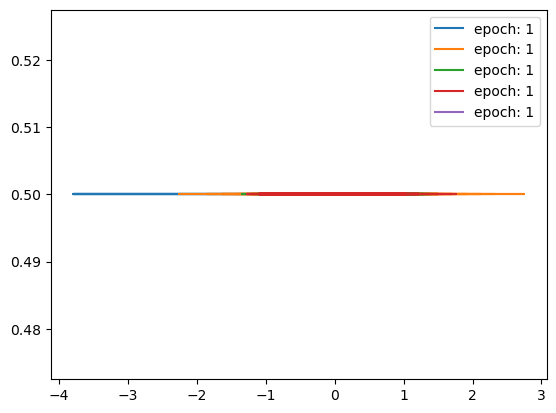

Epoch:  2  Loss:  -0.014597151346874697


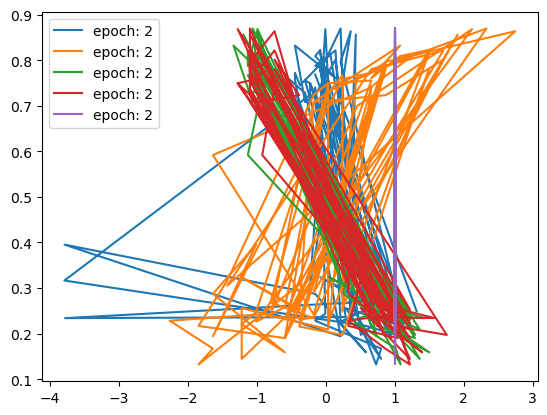

Epoch:  3  Loss:  -0.010540519145231146


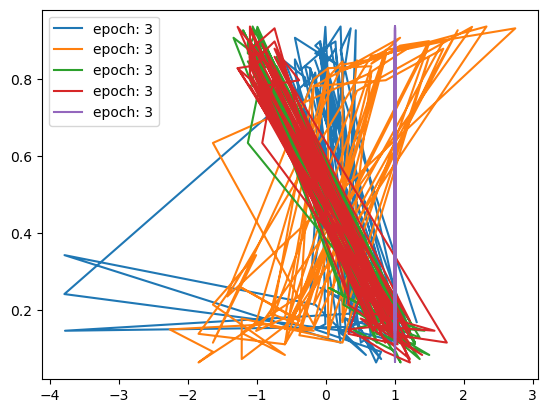

Epoch:  4  Loss:  -0.00818469015254306


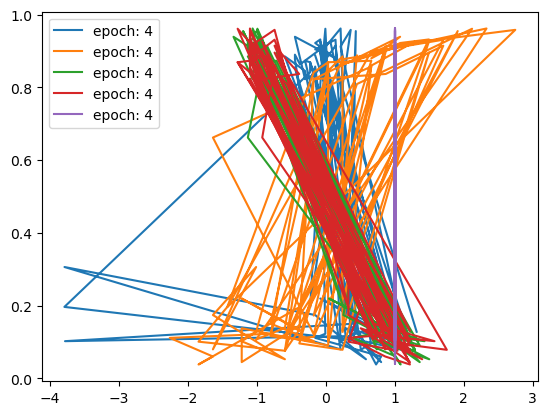

Epoch:  5  Loss:  -0.006659045654878827


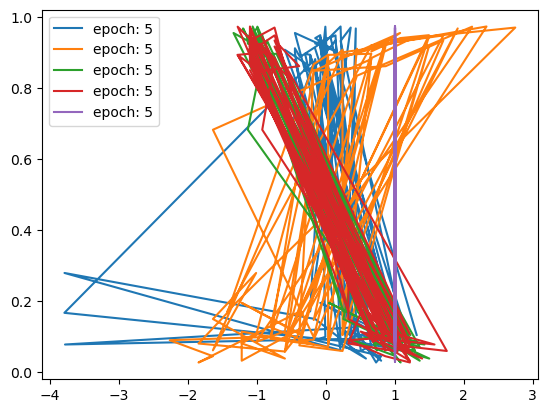

Epoch:  6  Loss:  -0.005589915975378721


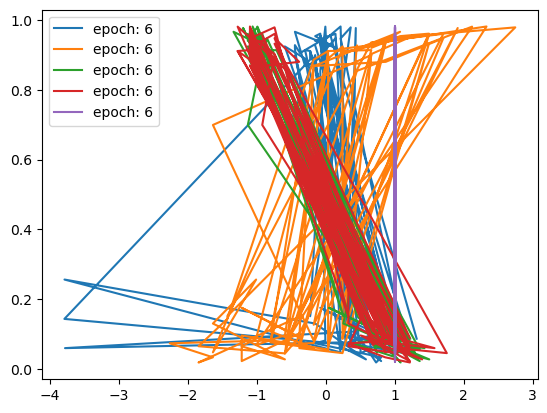

Epoch:  7  Loss:  -0.0047989356106202495


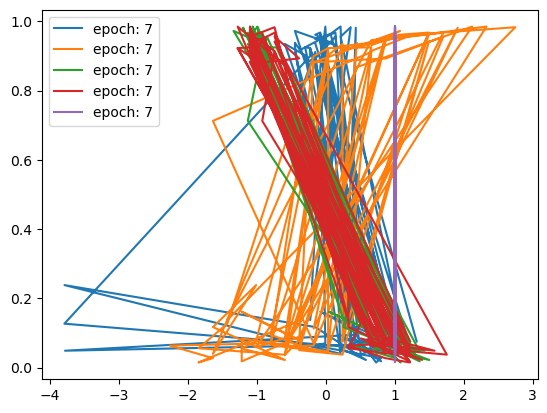

Epoch:  8  Loss:  -0.004190393119728455


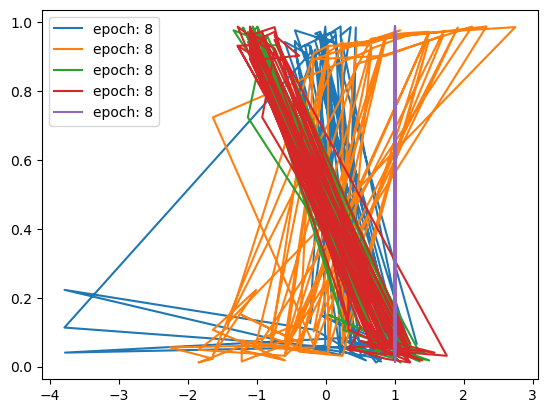

Epoch:  9  Loss:  -0.003708190264062143


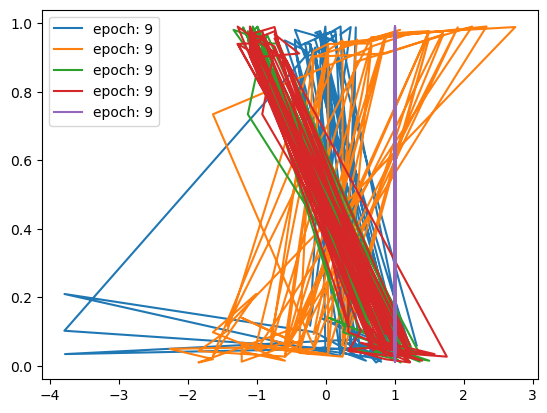

Epoch:  10  Loss:  -0.0033171820237466103


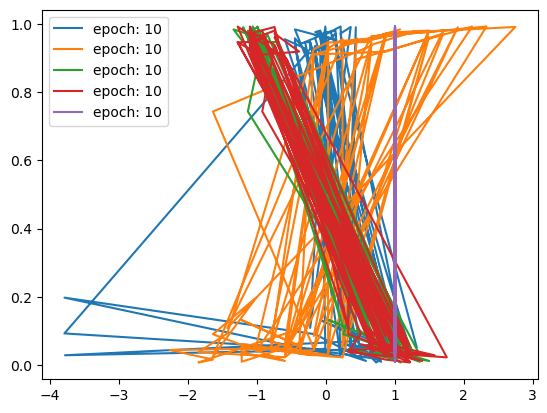

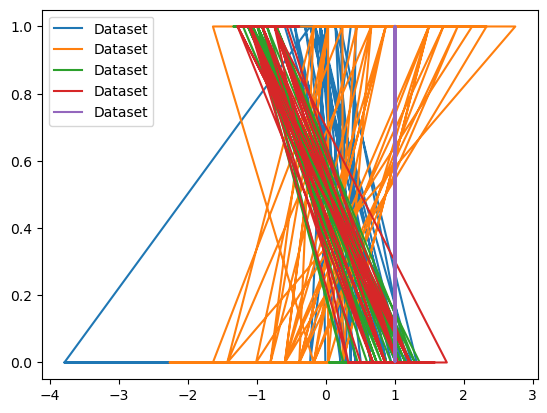

In [38]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.2,random_state=0)
W = fit(X_TRAIN,Y_TRAIN,epoch=10,lr=1)